In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_set=pd.read_csv("//Users//sreeramkn//Downloads//Fraud_check.csv")
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Initial investigation

In [3]:
data_set.shape

(600, 6)

In [4]:
data_set.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
data_set.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Number of features and records in the given data set is 6 and 600 respesctively

There is no null values in the data set

The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

### Data preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
data_set['Undergrad']=le.fit_transform(data_set['Undergrad'])
data_set['Marital.Status']=le.fit_transform(data_set['Marital.Status'])
data_set['Urban']=le.fit_transform(data_set['Urban'])
data_set.dtypes

Undergrad          int64
Marital.Status     int64
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int64
dtype: object

In [8]:
data_set.insert(6,'tax_category','')
data_set

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


In [9]:
import warnings
warnings.filterwarnings('ignore')

#### Converting taxable income to category of 0 and 1

In [10]:
for i in range(0,len(data_set['tax_category']),1):
    if data_set['Taxable.Income'][i]<=30000:
        data_set['tax_category'][i]='0'
    else:
        data_set['tax_category'][i]='1'

In [11]:
data_set['tax_category'].unique()

array(['1', '0'], dtype=object)

### Model building

In [12]:
x=data_set.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=data_set['tax_category']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Model training

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier().fit(x_train,y_train)

### Model testing

In [15]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

### Model evaluation

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [17]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.10      0.05      0.07        20
           1       0.83      0.91      0.87       100

    accuracy                           0.77       120
   macro avg       0.46      0.48      0.47       120
weighted avg       0.71      0.77      0.73       120



In [18]:
print(accuracy_score(y_test,y_pred_test))

0.7666666666666667


In [19]:
print(confusion_matrix(y_test,y_pred_test))

[[ 1 19]
 [ 9 91]]


<AxesSubplot:>

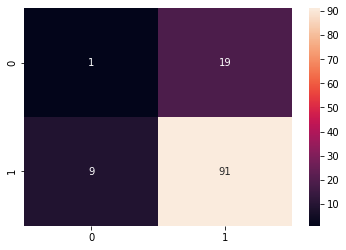

In [20]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_test,annot=True)

In [21]:
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for test data 0.48000000000000004


In [22]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = rf_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4],
                                                        'n_estimators' : [20,50,70,100,150]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 20}
0.7854166666666667


In [23]:
rf_model_tweak=RandomForestClassifier( n_estimators=150,min_samples_split=6,max_depth=10,min_samples_leaf=1).fit(x_train,y_train)

In [24]:
y_pred_test_tweak=rf_model_tweak.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.83      0.99      0.90       100

    accuracy                           0.82       120
   macro avg       0.42      0.49      0.45       120
weighted avg       0.69      0.82      0.75       120



In [26]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.825


In [27]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.495


<AxesSubplot:>

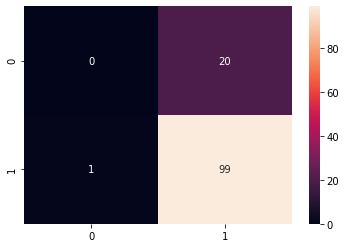

In [28]:
confusion_matrix_test=confusion_matrix(y_test,y_pred_test_tweak)
sns.heatmap(confusion_matrix_test,annot=True)